In [1]:
import pandas as pd
import numpy as np

In [11]:
# 数据地址
datafile = 'E:\\NLP\\Python_Data_Analysis_And_Mining_Actual_Combat\\chapter4\\demo\\data\\discretization_data.xls'
# 读取数据
data = pd.read_excel(datafile)
# copy 以‘肝气郁结证型系数’为索引列的数据 防止原始数据被污染
data = data[u'肝气郁结证型系数'].copy()
print(data)

0      0.056
1      0.488
2      0.107
3      0.322
4      0.242
5      0.389
6      0.246
7      0.330
8      0.257
9      0.205
10     0.330
11     0.235
12     0.267
13     0.281
14     0.184
15     0.271
16     0.100
17     0.173
18     0.302
19     0.176
20     0.172
21     0.195
22     0.281
23     0.245
24     0.156
25     0.168
26     0.211
27     0.255
28     0.279
29     0.341
       ...  
900    0.277
901    0.135
902    0.214
903    0.173
904    0.205
905    0.384
906    0.134
907    0.184
908    0.294
909    0.341
910    0.317
911    0.098
912    0.195
913    0.102
914    0.172
915    0.415
916    0.122
917    0.106
918    0.107
919    0.165
920    0.302
921    0.127
922    0.152
923    0.131
924    0.311
925    0.284
926    0.103
927    0.287
928    0.296
929    0.169
Name: 肝气郁结证型系数, Length: 930, dtype: float64


In [3]:
k = 4 

In [4]:
# 等宽离散化，各个类比依次命名为0， 1， 2， 3
'''
cut()函数可以将一个数组中的数据切分成几个部分。

将数据分为几个部分，就称为几个面元。

cut(数据数组,面元数组)
https://www.cnblogs.com/fightfordream/p/7072966.html
'''
d1 = pd.cut(data, k, labels = range(k))
print(d1)

0      0
1      3
2      0
3      2
4      1
5      3
6      1
7      2
8      1
9      1
10     2
11     1
12     2
13     2
14     1
15     2
16     0
17     1
18     2
19     1
20     1
21     1
22     2
23     1
24     1
25     1
26     1
27     1
28     2
29     2
      ..
900    2
901    0
902    1
903    1
904    1
905    2
906    0
907    1
908    2
909    2
910    2
911    0
912    1
913    0
914    1
915    3
916    0
917    0
918    0
919    1
920    2
921    0
922    1
923    0
924    2
925    2
926    0
927    2
928    2
929    1
Name: 肝气郁结证型系数, Length: 930, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [13]:
# 等频离散化
w = [1.0 * i / k for i in range(k + 1)]
print(w)
# 使用 describe 函数自动计算分位数
# percentiles -> 指定分位数分位标准
# 切片取值
w = data.describe(percentiles = w)[4:4 + k + 1]
w[0] = w[0] * (1 - np.e - 10)
print(1 - np.e - 10)
d2 = pd.cut(data, w, labels = range(k))

[0.0, 0.25, 0.5, 0.75, 1.0]
-11.718281828459045


In [6]:
# K-means 聚类
from sklearn.cluster import KMeans
# 建立模型，n_jobs -> 并行数(一般情况下等于cpu数)
kmodel = KMeans(n_clusters = k, n_jobs = 4)
# 训练模型
# reshape -> 给予数组一个新的形状，而不改变它的数据，参数为元组
# ML_BASE/blob/master/ml_base/_numpy/_numpy.ipynb
kmodel.fit(data.values.reshape((len(data), 1)))
# 输出聚类中心，并且排序(默认是随机序的)
# DataFrame 中的排序 -> sort_values
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
print(c)
# 相邻两项求中点，作边界点
w = c.rolling(window=2,center=False).mean().iloc[1:]
# 把 首尾 的边界点加上
w = [0] + list(w[0]) + [data.max()]
d3 = pd.cut(data, w, labels = range(k))

          0
3  0.136954
0  0.220441
2  0.295007
1  0.408679


In [7]:
# 自定义作图函数来显示聚类结果
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    # 正常显示中文标签, 设置 FangSong/黑体
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    # 解决 负号 的显示问题
    plt.rcParams['axes.unicode_minus'] = False
    # 创建图像区域，指定比例
    plt.figure(figsize = (8, 3))
    for j in range(0, k):
        plt.plot(data[d ==j], [i for i in d[d == j]], 'o')
    plt.ylim(-0.5, k-0.5)
    return plt

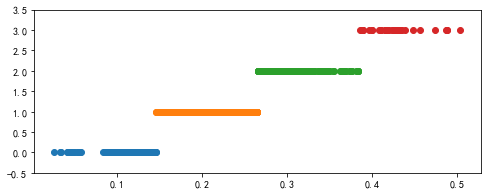

In [8]:
# 等宽离散化
cluster_plot(d1, k).show()

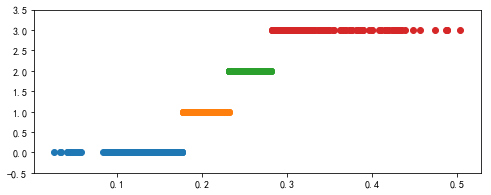

In [9]:
# 等频离散化
cluster_plot(d2, k).show()

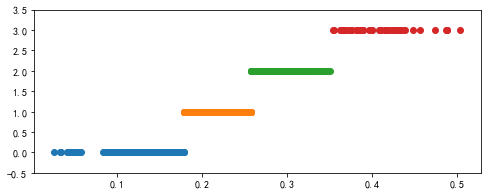

In [10]:
# (一维)聚类离散化
cluster_plot(d3, k).show()